# Exercise 1


In [21]:
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Utility functions for statistical tests
def chi_square_test(u, num_bins=10):
    n = len(u)
    observed_counts, _ = np.histogram(u, bins=num_bins, range=(0.0, 1.0))
    expected_count = n / num_bins
    chi2 = np.sum((observed_counts - expected_count) ** 2 / expected_count)
    critical_values = {1:3.841,2:5.991,3:7.815,4:9.488,5:11.071,6:12.592,7:14.067,8:15.507,9:16.919,10:18.307}
    df = num_bins - 1
    return chi2, critical_values.get(df)

def ks_test(u):
    n = len(u)
    u_sorted = np.sort(u)
    cdf = np.arange(1, n+1)/n
    d_plus = np.max(cdf - u_sorted)
    d_minus = np.max(u_sorted - np.arange(0, n)/n)
    d_stat = max(d_plus, d_minus)
    critical_value = 1.36/np.sqrt(n)
    return d_stat, critical_value

def runs_test(u):
    n = len(u)
    seq = (u > 0.5).astype(int)
    runs = 1 + np.sum(seq[1:] != seq[:-1])
    n1, n0 = seq.sum(), n - seq.sum()
    expected_runs = 2*n1*n0/n + 1
    var_runs = (2*n1*n0*(2*n1*n0 - n))/(n**2*(n-1))
    z_score = (runs - expected_runs)/np.sqrt(var_runs)
    return runs, expected_runs, z_score

def autocorrelation(u, lag=1):
    n = len(u)
    mean_u = np.mean(u)
    num = np.sum((u[:n-lag]-mean_u)*(u[lag:]-mean_u))
    den = np.sum((u-mean_u)**2)
    return num/den if den!=0 else 0

In [23]:
# LCG implementation
class LCG:
    def __init__(self, seed, a, b, m):
        self.state = seed
        self.a = a
        self.b = b
        self.m = m

    def random(self):
        self.state = (self.a*self.state + self.b) % self.m
        return self.state

    def random_sequence(self, n):
        seq = np.empty(n)
        for i in range(n):
            seq[i] = self.random()
        return seq/self.m

In [24]:
# Function to analyze a generator
def analyze_generator(u, label="Generator"):
    print(f"\n=== Analysis for {label} ===")
    plt.hist(u, bins=10, range=(0,1), edgecolor='black')
    plt.title(f"{label}: Histogram")
    plt.show()
    plt.scatter(u[:-1], u[1:], s=1)
    plt.title(f"{label}: Scatter (u_i vs u_i+1)")
    plt.show()
    chi2, chi2_crit = chi_square_test(u)
    print(f"Chi2 stat={chi2:.4f}, crit={chi2_crit}")
    d, d_crit = ks_test(u)
    print(f"KS stat={d:.4f}, crit={d_crit:.4f}")
    runs, exp_runs, z = runs_test(u)
    print(f"Runs={runs}, exp={exp_runs:.2f}, z={z:.4f}")
    for lag in [1,2,5,10]: print(f"Autocorr lag{lag}={autocorrelation(u,lag):.4f}")


=== Analysis for LCG Bad (a=13,b=0,m=16) ===


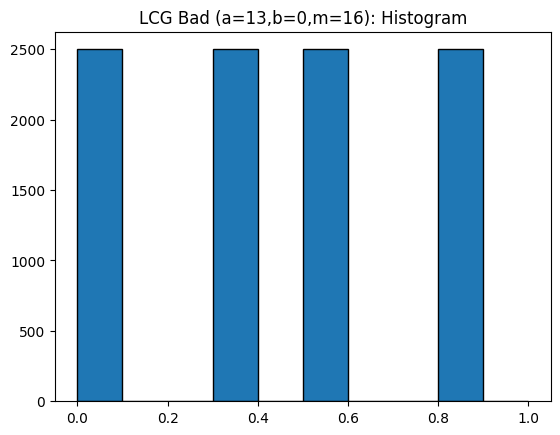

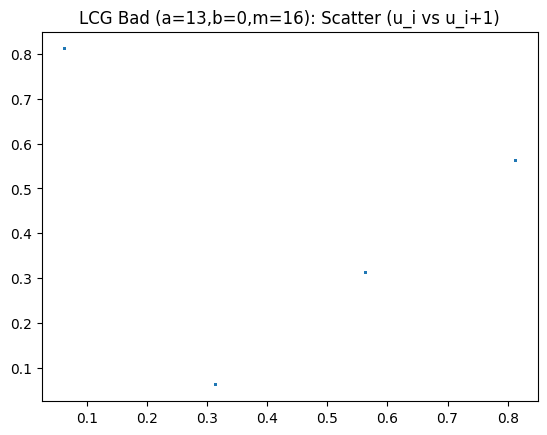

Chi2 stat=15000.0000, crit=16.919
KS stat=0.1875, crit=0.0136
Runs=5000, exp=5001.00, z=-0.0200
Autocorr lag1=-0.1998
Autocorr lag2=-0.5999
Autocorr lag5=-0.1997
Autocorr lag10=-0.5994

=== Analysis for LCG Good (Numerical Recipes) ===


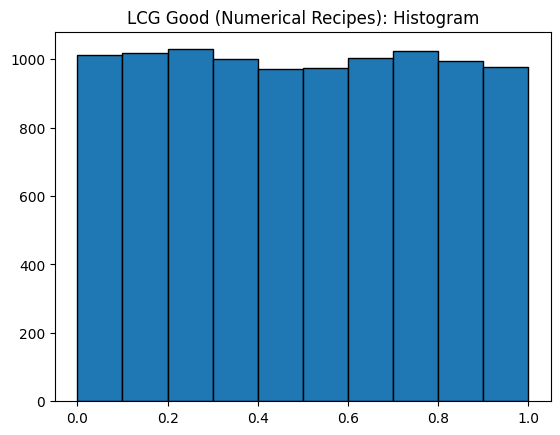

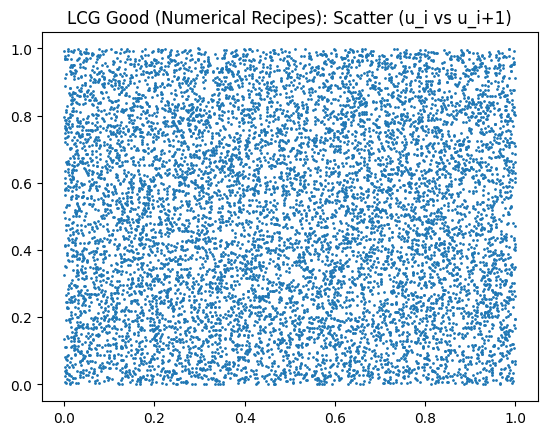

Chi2 stat=4.0540, crit=16.919
KS stat=0.0079, crit=0.0136
Runs=5018, exp=5000.83, z=0.3434
Autocorr lag1=0.0044
Autocorr lag2=0.0129
Autocorr lag5=-0.0155
Autocorr lag10=-0.0028

=== Analysis for NumPy RNG ===


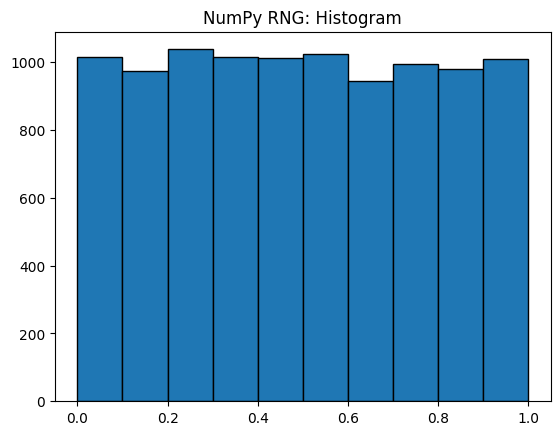

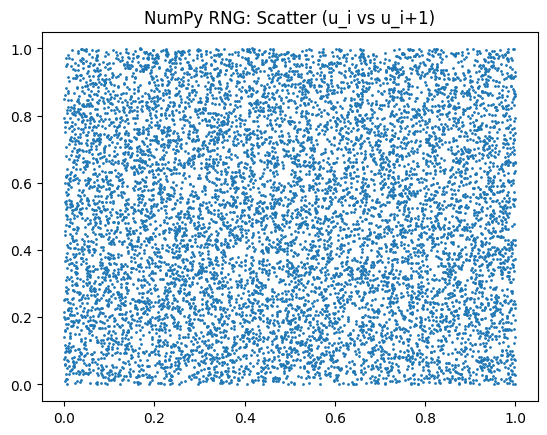

Chi2 stat=6.6500, crit=16.919
KS stat=0.0087, crit=0.0136
Runs=5024, exp=5000.48, z=0.4705
Autocorr lag1=-0.0036
Autocorr lag2=-0.0051
Autocorr lag5=0.0062
Autocorr lag10=-0.0145


In [25]:
# Main execution
n = 10000
lcg_bad = LCG(seed=1, a=13, b=0, m=16)
u_bad = lcg_bad.random_sequence(n)
analyze_generator(u_bad, label="LCG Bad (a=13,b=0,m=16)")

lcg_good = LCG(seed=1, a=1664525, b=1013904223, m=2**32)
u_good = lcg_good.random_sequence(n)
analyze_generator(u_good, label="LCG Good (Numerical Recipes)")

u_np = np.random.rand(n)
analyze_generator(u_np, label="NumPy RNG")

## Discussion
A single sequence may not reveal all generator flaws. Run multiple seeds and aggregate test statistics for robust evaluation.